---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Importing modules

In [100]:
import pandas as pd

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

### Preparing the datasets

In [2]:
# Importing dataset
energy = pd.read_excel('Energy Indicators.xls')
# Deleting extra columns
energy.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1, inplace=True)
# Excluding the footer and header information from the datafile.
energy = energy[16:243]
# Visualizating dataframes
energy.head() # first five
energy.tail() # last five

,Environmental Indicators: Energy,Unnamed: 3,Unnamed: 4,Unnamed: 5
238,Viet Nam,2554,28,45.3215
239,Wallis and Futuna Islands,0,26,0
240,Yemen,344,13,0
241,Zambia,400,26,99.7147
242,Zimbabwe,480,32,52.5361


In [3]:
# Renaming columns
new_column_names = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy.columns = new_column_names

energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
16,Afghanistan,321,10,78.6693
17,Albania,102,35,100
18,Algeria,1959,51,0.55101
19,American Samoa,...,...,0.641026
20,Andorra,9,121,88.6957


In [4]:
# Checking missing values
energy.isnull().sum()

Country                     0
Energy Supply               0
Energy Supply per Capita    0
% Renewable                 0
dtype: int64

In [5]:
# Checking types
energy.dtypes

Country                     object
Energy Supply               object
Energy Supply per Capita    object
% Renewable                 object
dtype: object

In [6]:
# Replacing '...' to 'None' 
energy.replace({'...': None},inplace =True)
# Check missing values again
energy.isnull().sum()

Country                     0
Energy Supply               5
Energy Supply per Capita    5
% Renewable                 0
dtype: int64

In [7]:
# Checking types again
energy.dtypes

Country                      object
Energy Supply               float64
Energy Supply per Capita    float64
% Renewable                 float64
dtype: object

In [8]:
# Converting Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule)
energy['Energy Supply'] = energy['Energy Supply'].apply(lambda x : x*1000000)
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
16,Afghanistan,3.210000e+08,10.0,78.669280
17,Albania,1.020000e+08,35.0,100.000000
18,Algeria,1.959000e+09,51.0,0.551010
19,American Samoa,NaN,NaN,0.641026
20,Andorra,9.000000e+06,121.0,88.695650


In [9]:
# Getting rid numbers from countries names
energy['Country'] = energy['Country'].str.strip('1234567891011121314151617181920')

In [10]:
# Renaming some countries
energy.replace({"Republic of Korea": "South Korea",
                    "United States of America": "United States",
                    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                    "China, Hong Kong Special Administrative Region": "Hong Kong",
                    "Bolivia (Plurinational State of)" : "Bolivia",
                    "Venezuela (Bolivarian Republic of)" : "Venezuela"},inplace =True)
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
16,Afghanistan,3.210000e+08,10.0,78.669280
17,Albania,1.020000e+08,35.0,100.000000
18,Algeria,1.959000e+09,51.0,0.551010
19,American Samoa,NaN,NaN,0.641026
20,Andorra,9.000000e+06,121.0,88.695650
21,Angola,6.420000e+08,27.0,70.909090
22,Anguilla,2.000000e+06,136.0,0.000000
23,Antigua and Barbuda,8.000000e+06,84.0,0.000000
24,Argentina,3.378000e+09,79.0,24.064520
25,Armenia,1.430000e+08,48.0,28.236060


In [11]:
# Importing dataset
gdp = pd.read_csv('world_bank.csv')
# Exclude the footer and header information from the datafile.
gdp = gdp[4:268]
# Visualization
gdp.head(2)

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
4,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
5,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN


In [12]:
# Deleting unneccessary columns
gdp.drop(['World Development Indicators', 'Unnamed: 2', 'Unnamed: 3'], axis=1, inplace=True)

In [13]:
# Checking number of columns
gdp.shape[1]

57

In [14]:
# Checking number of new columns
i = 0
len(['Country'] + [(1960+i) for i in range(56)])

57

In [15]:
# Renaming columns
i = 0
new_column_names = ['Country'] + [(1960+i) for i in range(56)]
gdp.columns = new_column_names
# Visualization
gdp.head() 

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
4,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
5,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
6,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
7,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
8,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [16]:
# Renaming some countries
gdp.replace({"Korea, Rep.": "South Korea", 
            "Iran, Islamic Rep.": "Iran",
            "Hong Kong SAR, China": "Hong Kong"},inplace =True)

In [17]:
# Importing dataset
scimEn = pd.read_excel('scimagojr-3.xlsx')
scimEn.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


In [18]:
# Indexing by 'Country'
energy = energy.set_index('Country')
gdp = gdp.set_index('Country')
scimEn = scimEn.set_index('Country')

In [19]:
# Selecting the last 10 years
GDP = gdp[[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]]
GDP.head(1)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [20]:
# Selecting the top 15 countries by Scimagojr 'Rank'
ScimEn = scimEn.loc[:'Brazil']
ScimEn

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,
China,1,127050,126767,597237,411683,4.70,138
United States,2,96661,94747,792274,265436,8.20,230
Japan,3,30504,30287,223024,61554,7.31,134
United Kingdom,4,20944,20357,206091,37874,9.84,139
Russian Federation,5,18534,18301,34266,12422,1.85,57
Canada,6,17899,17620,215003,40930,12.01,149
Germany,7,17027,16831,140566,27426,8.26,126
India,8,15005,14841,128763,37209,8.58,115
France,9,13153,12973,130632,28601,9.93,114


### Merge dataframes - answer question 1

In [21]:
def answer_one():
    # Merge the dataframes: 'ScimEn' and 'Energy' using the intersection (it is not possible merge three)
    ScimEn_Energy = pd.merge(ScimEn, energy, how='inner', left_index=True, right_index=True)
    # Merge three dataframes
    ScimEn_Energy_GDP = pd.merge(ScimEn_Energy, GDP, how='inner', left_index=True, right_index=True)
    return ScimEn_Energy_GDP

answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Australia,14,8831,8725,90765,15606,10.28,107,5.386000e+09,231.0,11.810810,1.021939e+12,1.060340e+12,1.099644e+12,1.119654e+12,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.648030,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
Spain,12,9428,9330,123336,23964,13.08,115,4.923000e+09,106.0,37.968590,1.414823e+12,1.468146e+12,1.484530e+12,1.431475e+12,1.431673e+12,1.417355e+12,1.380216e+12,1.357139e+12,1.375605e+12,1.419821e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12


### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [22]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [23]:
def answer_two():
    # Merging the dataframes: 'ScimEn' and 'Energy' using the intersection
    ScimEn_Energy_inner = pd.merge(ScimEn, energy, how='inner', left_index=True, right_index=True)
    # Merging the dataframes: 'scimEn' (without cuts of 'Rank') and 'Energy' using the outer
    ScimEn_Energy_outer = pd.merge(ScimEn, energy, how='outer', left_index=True, right_index=True)
    # Merging three dataframes (inner)
    ScimEn_Energy_GDP_inner = pd.merge(ScimEn_Energy_inner, GDP, how='inner', left_index=True, right_index=True)
    # Merging three dataframes (outer)
    ScimEn_Energy_GDP_outer = pd.merge(ScimEn_Energy_outer, GDP, how='outer', left_index=True, right_index=True)
    return ScimEn_Energy_GDP_outer.shape[0] - ScimEn_Energy_GDP_inner.shape[0]

answer_two()

291

## Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [24]:
def answer_three():
    # There are top 15 countries in the answer_one() 
    Top15 = answer_one()
    # Selecting just the last 10 years
    Top15 = Top15[[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]]
    # Avarage sorted in descending order
    return Top15.mean(axis=1).sort_values(ascending=False)

answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
dtype: float64

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [ ]:
Top15 = answer_one()
Top15

In [36]:
sixth['Citations']

Country
Canada    215003
Name: Citations, dtype: int64

In [35]:
Top15 = answer_one()
# Searching the 6th
sixth = Top15.query("Rank == 6")
diff = sixth['2015'] - sixth['2006']
#diff
#sixth['2016']

KeyError: '2015'

In [ ]:
def answer_four():
    Top15 = answer_one()
    # Searching the 6th
    sixth = Top15.query("Rank == 6")
    return "ANSWER"

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [44]:
def answer_five():
    Top15 = answer_one()
    return Top15['Energy Supply per Capita'].mean()

answer_five()

160.35714285714286

### Question 6 (6.6%)
What country has the maximum `% Renewable` and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [58]:
def answer_six():
    Top15 = answer_one()
    # Country that has the maximum % Renewable
    max_ren_cou = Top15['% Renewable'].idxmax()
    # Maximum % Renewable
    max_ren = Top15['% Renewable'].max()
    return (max_ren_cou, max_ren)

answer_six()

('Brazil', 69.648030000000006)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [59]:
def answer_seven():
    Top15 = answer_one()
    # Creating a new column of Ratio Citations
    Top15['Ratio Citations'] = Top15['Self-citations']/Top15['Citations']
    # Country that has the maximum Ratio Citations
    max_rat_cou = Top15['Ratio Citations'].idxmax()
    # Maximum Ratio Citations
    max_rat = Top15['Ratio Citations'].max()
    return (max_rat_cou, max_rat)

answer_seven()

('China', 0.68931261793894216)

In [42]:
Top15.head(1)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Australia,14,8831,8725,90765,15606,10.28,107,5.386000e+09,231.0,11.81081,1.021939e+12,1.060340e+12,1.099644e+12,1.119654e+12,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12


### Question 8 (6.6%)

Create a column that estimates the population using `Energy Supply` and `Energy Supply per capita`. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [97]:
def answer_eight():
    Top15 = answer_one()
    # Creating a new column of Estimates the population
    Top15['Pop Estimate'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
    # Organizing the most populous countries
    Top15 = Top15.sort_values(['Pop Estimate'], ascending=False)
    # Reseting index to use 'loc' by index
    Top15 = Top15.reset_index()
    # Using loc to find third most populous country
    return Top15.loc[2, 'Country']

answer_eight()

'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [107]:
def answer_nine():
    Top15 = answer_one()
    # Population Estimate
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    # Citable docs per Capita
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    # Correlation
    return Top15['Citable docs per Capita'].corr(Top15['Energy Supply per Capita'])

answer_nine()

0.79019354883008763

In [98]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

In [ ]:
#plot9() # Be sure to comment out plot9() before submitting the assignment!

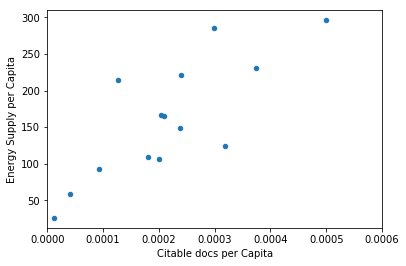

In [99]:
plot9()

### Question 10 (6.6%)
Create a new column with a 1 if the country's `% Renewable` value is at or above the median for all countries in the top 15, and a 0 if the country's `% Renewable` value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [113]:
def answer_ten():
    Top15 = answer_one()
    # median
    median = Top15['% Renewable'].median()
    # New column binary
    Top15['HighRenew'] = [1 if x >= median else 0 for x in Top15['% Renewable']]
    return Top15['HighRenew'].sort_values(ascending=True)

answer_ten()

Country
Australia             0
France                0
United Kingdom        0
India                 0
Japan                 0
South Korea           0
United States         0
Brazil                1
Canada                1
China                 1
Germany               1
Spain                 1
Italy                 1
Russian Federation    1
Name: HighRenew, dtype: int64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [ ]:
def answer_eleven():
    Top15 = answer_one()
    # Grouping the Countries by Continent
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    
    return "ANSWER"

### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [ ]:
def answer_twelve():
    Top15 = answer_one()
    return "ANSWER"

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [ ]:
def answer_thirteen():
    Top15 = answer_one()
    return "ANSWER"

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [ ]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

In [ ]:
#plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!